In [3]:
#動画切り抜き
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
import os

# ビデオデータの読み込み
filename ="C:\\Users\\flow\\Desktop\\Yurikusa\\4K\\00089.mp4"
# 動画の読み込み
cap = cv2.VideoCapture(filename=filename)
#動画ファイルの情報を取得する
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
hight = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
total_frame = cap.get(cv2.CAP_PROP_FRAME_COUNT)
fps = cap.get(cv2.CAP_PROP_FPS)


#print("動画の幅: ", width)
#print("動画の高さ: ", hight)
print("総フレーム数: ", total_frame)
print("fps: ", fps)
print("動画の長さ: ", total_frame/fps, "[sec]")

#print(type(cap))
#print(cap.isOpened())


総フレーム数:  3450.0
fps:  29.97002997002997
動画の長さ:  115.11500000000001 [sec]


In [5]:
#動画切り出し
path="C:\\Users\\flow\\Desktop\\Yurikusa\\4K\\"
print(path)
path1=path.replace('\\','')
print(path1)

C:\Users\flow\Desktop\Yurikusa\4K\
C:UsersflowDesktopYurikusa4K


In [4]:
def save_frame_play(video_path, dir_path, basename, ext='bmp', delay=1, window_name='frame'):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        return

    os.makedirs(dir_path,exist_ok=True)
    base_path = os.path.join(dir_path, basename)

    digit = len(str(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))))

    n = 0
    while True:
        ret, frame = cap.read()
        if ret:
            cv2.imshow(window_name, frame)
            key = cv2.waitKey(delay) & 0xFF
            if key == ord('c'):
                cv2.imwrite('{}.{}'.format(base_path +str(n).zfill(digit), ext), frame)
                print("save picture{:0=3}".format(n)+".bmp")
            elif key == ord('q'):
                break
            n += 1
        else:
            cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
            n = 0

    cv2.destroyWindow(window_name)
    print(base_path)
    print(digit)
    print(dir_path)

save_frame_play(filename, path+'date', 'picture', delay=0)

save picture000.bmp
save picture001.bmp
save picture002.bmp
save picture003.bmp
save picture004.bmp
save picture005.bmp
save picture006.bmp
save picture007.bmp
save picture008.bmp
save picture009.bmp
save picture010.bmp
save picture011.bmp
save picture012.bmp
save picture013.bmp
save picture014.bmp
save picture015.bmp
save picture016.bmp
save picture017.bmp
save picture018.bmp
save picture019.bmp
save picture020.bmp
save picture021.bmp
save picture022.bmp
save picture023.bmp
save picture024.bmp
save picture025.bmp
save picture026.bmp
save picture027.bmp
save picture028.bmp
save picture029.bmp
save picture030.bmp
save picture031.bmp
save picture032.bmp
save picture033.bmp
save picture034.bmp
save picture035.bmp
save picture036.bmp
save picture037.bmp
save picture038.bmp
save picture039.bmp
save picture040.bmp
save picture041.bmp
save picture042.bmp
save picture043.bmp
save picture044.bmp
save picture045.bmp
save picture046.bmp
save picture047.bmp
save picture048.bmp
save picture049.bmp


In [6]:
def save_all_frames(video_path, dir_path, basename, ext='bmp'):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        return

    os.makedirs(dir_path, exist_ok=True)
    base_path = os.path.join(dir_path, basename)

    digit = len(str(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))))

    n = 0

    while True:
        ret, frame = cap.read()
        if ret:
            cv2.imwrite('{}.{}'.format(base_path +str(n).zfill(digit), ext), frame)
            n += 1
        else:
            return

save_all_frames(filename, path+'alldate', 'picture')


In [49]:
#輪郭検出
path2="C:\\Users\\flow\\Desktop\\Yurikusa\\otameshi\\"
picture="C:\\Users\\flow\\Desktop\\Yurikusa\\MMPE\\真球膨張.tif"
img=cv2.imread(picture)
#ぼかしをいれる
dst = cv2.GaussianBlur(img, (17, 17), 0)
dst1=cv2.imwrite(path2+'dst000001.bmp',dst)
gray=cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
ret, binary = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
img2=cv2.imwrite(path2+'binary000001.bmp',binary)
plt.imshow(binary, cmap = "gray")
plt.show
contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
img3=cv2.imread(picture)
contours.sort(key=lambda x: cv2.contourArea(x), reverse=True)
cv2.drawContours(img3, [contours[4]], -1, (0,255,0), 2)
cv2.imwrite(path2+'contours000001.bmp',img3)
plt.imshow(img3, cmap = "gray")
plt.show

cnt=contours[4]
area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt,True)

print(area,perimeter)


error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-sn_xpupm\opencv\modules\imgproc\src\smooth.dispatch.cpp:617: error: (-215:Assertion failed) !_src.empty() in function 'cv::GaussianBlur'


8157.0 343.8477599620819


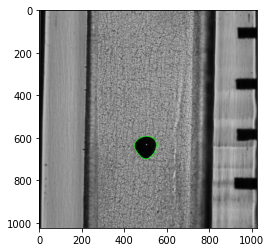

In [7]:
path2="C:\\Users\\flow\\Desktop\\Yurikusa\\otameshi\\"
path3="C:\\Users\\flow\\Desktop\\Yurikusa\\MMPE\\"
def contours(picture,dst_name,binary_name,contours_name,list_name):
    img=cv2.imread(picture)
    #ぼかしをいれる
    dst = cv2.GaussianBlur(img, (17, 17), 0)
    dst1=cv2.imwrite(path2+dst_name,dst)
    gray=cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
    ret, binary = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    img2=cv2.imwrite(path2+binary_name,binary)
    plt.imshow(binary, cmap = "gray")
    plt.show
    contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    img3=cv2.imread(picture)
    contours.sort(key=lambda x: cv2.contourArea(x), reverse=True)
    cv2.drawContours(img3, [contours[4]], -1, (0,255,0), 2)
    cv2.imwrite(path2+contours_name,img3)
    plt.imshow(img3, cmap = "gray")
    plt.show

    cnt=contours[4]
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt,True)

    print(area,perimeter)
    perimeter_list=[]
    perimeter_list.append(perimeter)
    with open(path2+list_name,'w',newline='') as f:
        writer = csv.writer(f)
        writer.writerow(perimeter_list)
    
contours(path3+"Tetrahedron-expansion.bmp","dst_Tetrahedron-expansion.bmp","binary_Tetrahedron-expansion.bmp","contours_Tetrahedron-expansion.bmp","Tetrahedron-expansion.csv")    

In [10]:
#キャリブレーション
global x
global y
xlist=[]
ylist=[]
file_name=path3+'Cusp-contraction.bmp'
img=cv2.imread(file_name,cv2.IMREAD_GRAYSCALE)



def click_pos(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        img2 = np.copy(img)
        cv2.circle(img2,center=(x,y),radius=5,color=255,thickness=-1)
        pos_str='(x,y)=('+str(x)+','+str(y)+')'
        cv2.putText(img2,pos_str,(x+10, y+10),cv2.FONT_HERSHEY_PLAIN,2,255,2,cv2.LINE_AA)
        cv2.imshow('window', img2)
        print(x,y)
        xlist.append(x)
        ylist.append(y)
        
cv2.imshow('window', img)
cv2.setMouseCallback('window', click_pos)
cv2.waitKey(0)
cv2.destroyAllWindows() 
print(xlist)
print(ylist)


929 558 1
929 608 1
933 558 1
929 610 1
[929, 929, 933, 929]
[558, 608, 558, 610]


In [ ]:
dis_list=[]
for a in range(len(xlist)-1):
    x1=xlist[a]
    x2=xlist[a+1]
    y1=ylist[a]
    y2=ylist[a+1]
    dis=((x1-x2)**2+(y1-y2)**2)**(1/2)
    dis_list.append(dis)
    #print(x1,y1,x2,y2)
    #print(dis)
mean=sum(dis_list)/float(len(dis_list))
print(mean)
print('ピクセル数/mm=',mean,'p/mm')
list_mm=['ピクセル数/mm=',mean,'p/mm']
#--------------------------------------------------------------------------------------------------------------------------
#csvファイルに保存してくよ
import csv
with open(path2+'mmchange.csv','w',newline='') as f:
    writer = csv.writer(f)
    writer.writerow(list_mm)